In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
#sys.path.insert(0, '/opt/conda/envs/FairMOT/lib/python3.8/site-packages')
from plotnine import *
from plotnine.animation import PlotnineAnimation

In [76]:
path = "/usr/users/vogg/FairMOT/videos/new_tracking/VID_20210223_123817_0/mcqcp200/"

header = ['frame', 'animal_id', 'x', 'y', 'w', 'h', 'a', 'b', 'c', 'd']

detections = pd.read_csv(path + "results.txt", header = 0, names = header)

detections

,frame,animal_id,x,y,w,h,a,b,c,d
0,1,2,1450.940430,229.493927,165.515991,301.887421,1,-1,-1,-1
1,1,3,831.503906,527.351257,233.450806,276.859863,1,-1,-1,-1
2,1,4,1173.264038,340.723480,262.206421,277.090790,1,-1,-1,-1
3,2,1,356.900843,460.314369,587.765228,467.580752,1,-1,-1,-1
4,2,2,1451.371228,229.763728,165.358715,301.487857,1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...
2255,391,3,649.382731,388.627692,159.821581,286.294430,1,-1,-1,-1
2256,391,5,786.623279,300.202396,185.725634,316.834227,1,-1,-1,-1
2257,391,2,1215.253343,312.324191,269.361557,210.762278,1,-1,-1,-1
2258,391,10,974.707705,293.533430,172.005080,225.672864,1,-1,-1,-1


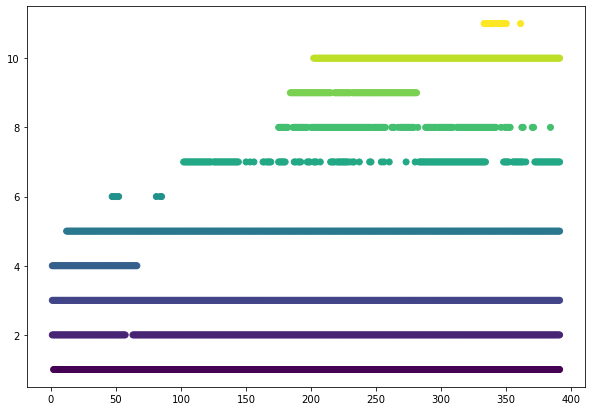

In [30]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.scatter(detections.frame, detections.animal_id, c = detections.animal_id)

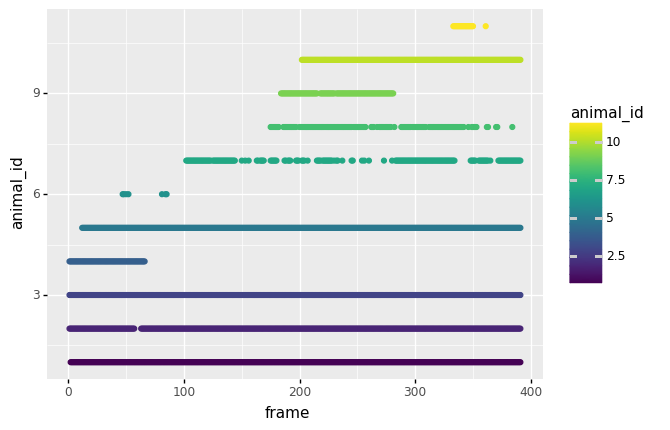

<ggplot: (8733229737331)>

In [79]:
ggplot(detections, aes(x = 'frame', y = 'animal_id', color = 'animal_id')) + geom_point()

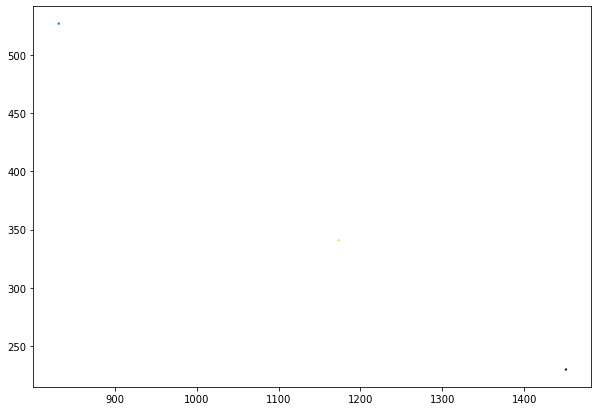

In [31]:
fig, ax = plt.subplots(figsize=(10, 7))

subset = detections.loc[detections.frame == 1]

scat = ax.scatter(subset.x, subset.y, c = subset.animal_id, s = 2)

In [32]:
import matplotlib.animation as animation

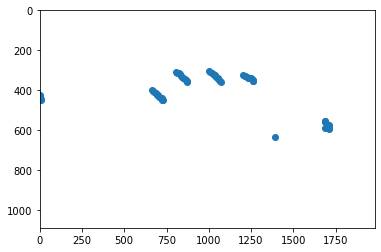

In [71]:


# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 1980), ylim=(1088, 0))
scat, = ax.plot([], [], 'o', linestyle = '')

# animation function.  This is called sequentially
def animate(i):
    j = max(i-10, 1)
    subset = detections.loc[(detections.frame <=i) & (detections.frame >= j)]
    x = subset.x
    y = subset.y
    col = subset.animal_id
    scat.set_data(x, y)
    return scat,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, 
                               frames=390, interval=1, blit=True)


anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

In [43]:
max(8-10, 1)

1

In [184]:
detections.animal_id = pd.Categorical(detections.animal_id)

def animate(frame_sel):
    j = max(frame_sel-30, 1)
    subset = detections.loc[(detections.frame <= frame_sel) & (detections.frame >= j)]
    g = (ggplot(subset, aes(x = 'x', y = 'y', color = 'animal_id', alpha = '1-(frame_sel-frame)/j'))
         + geom_point() 
         + lims(x = (0, 1980), y = (1088,0), alpha = (0,1))
         + theme(legend.position = "none")
        )
    return(g)

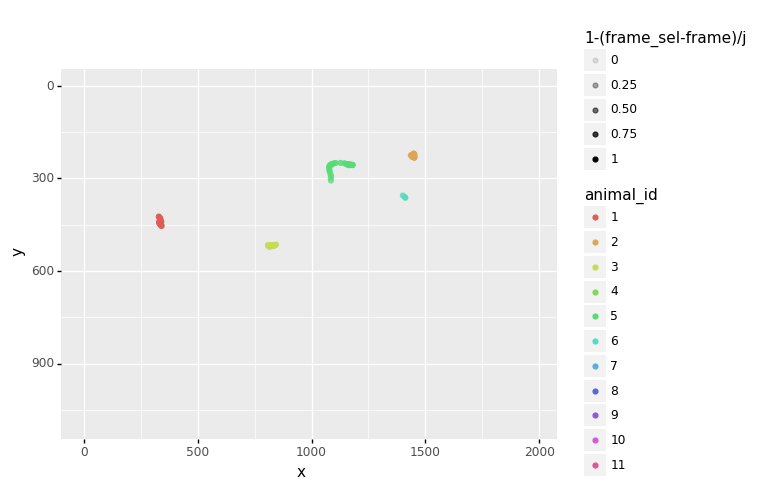

<ggplot: (8733229457204)>

In [185]:
animate(100)

In [186]:
plots = (animate(k) for k in np.linspace(1, 200, 200))


ani = PlotnineAnimation(plots, interval=50, repeat_delay=200)
#ani.save('animation.mp4')
#ani